In [31]:
root_dir = "/data2/om/ADNI dataset/data/AD_processed"
file = "401_mprage.nii"
filepath = "/data2/om/ADNI dataset/data/AD_processed/401_mprage.nii"
filepath = "/data2/om/ADNI dataset/data/AD_processed/601_mprage_brain.nii"


In [32]:
import nibabel as nib
# Load the NIfTI file
nii_file = nib.load(filepath)

# Get the image data array
image_data = nii_file.get_fdata()

# Accessing metadata
header = nii_file.header


In [33]:
image_data.shape

(170, 256, 170)

In [38]:
type(image_data)
import torch

# Convert image_data into a PyTorch tensor
image_tensor = torch.tensor(image_data)


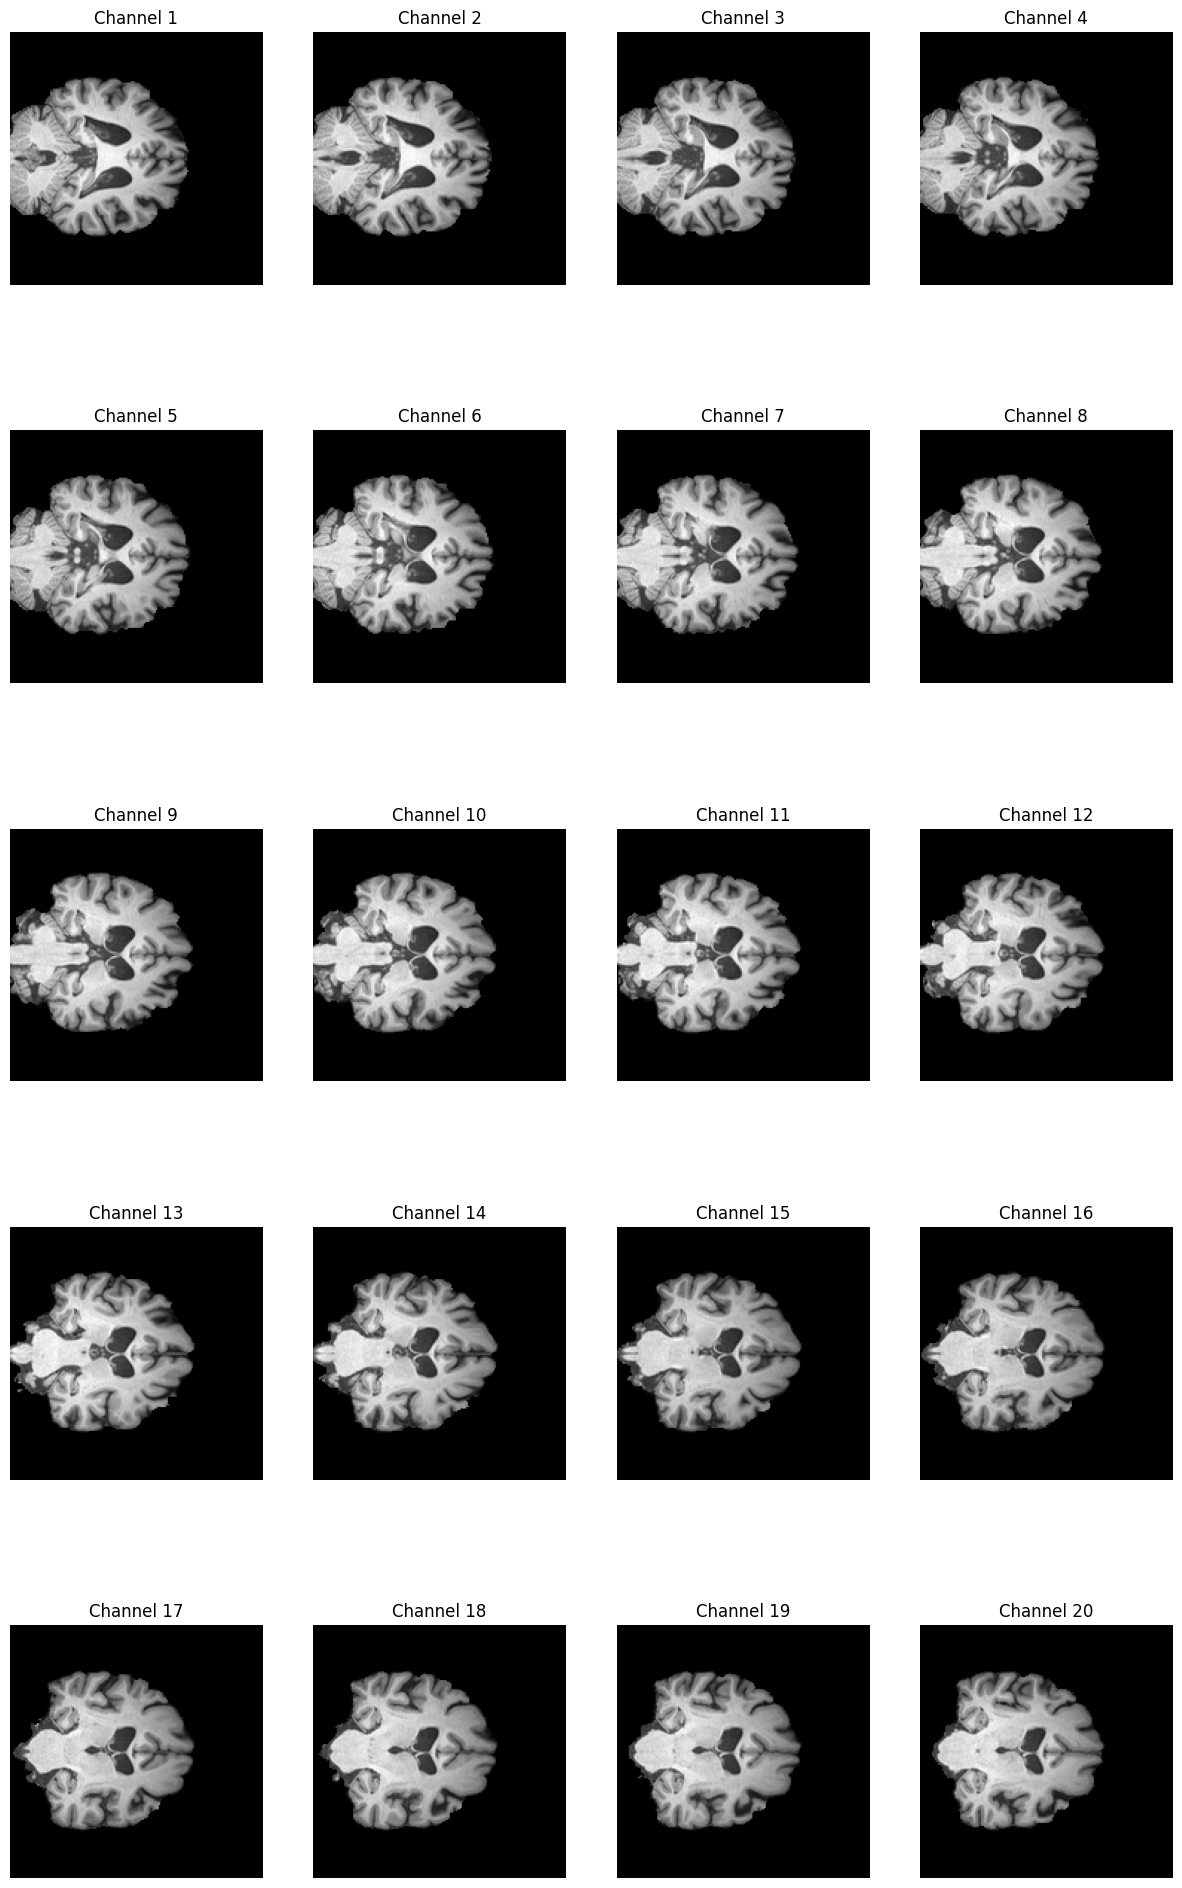

In [42]:
import matplotlib.pyplot as plt

# Visualize the top 3 channels of the image data
num_channels = 20
num_cols = 4
num_rows = -(-num_channels // num_cols)  # Ceiling division to calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i in range(num_channels):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(image_data[:, 100+i, :], cmap='gray')
    axs[row, col].set_title(f'Channel {i+1}')
    axs[row, col].axis('off')
plt.show()


In [40]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

from dataset import BrainDataset
braindataset = BrainDataset(data_dir="/data2/om/ADNI dataset/data")
dataloader = DataLoader(braindataset, batch_size=8, shuffle=True)
for data, labels in dataloader:
        print(data.shape)
        break



torch.Size([8, 1, 170, 256, 170])


In [44]:
img_data = data[0][0]

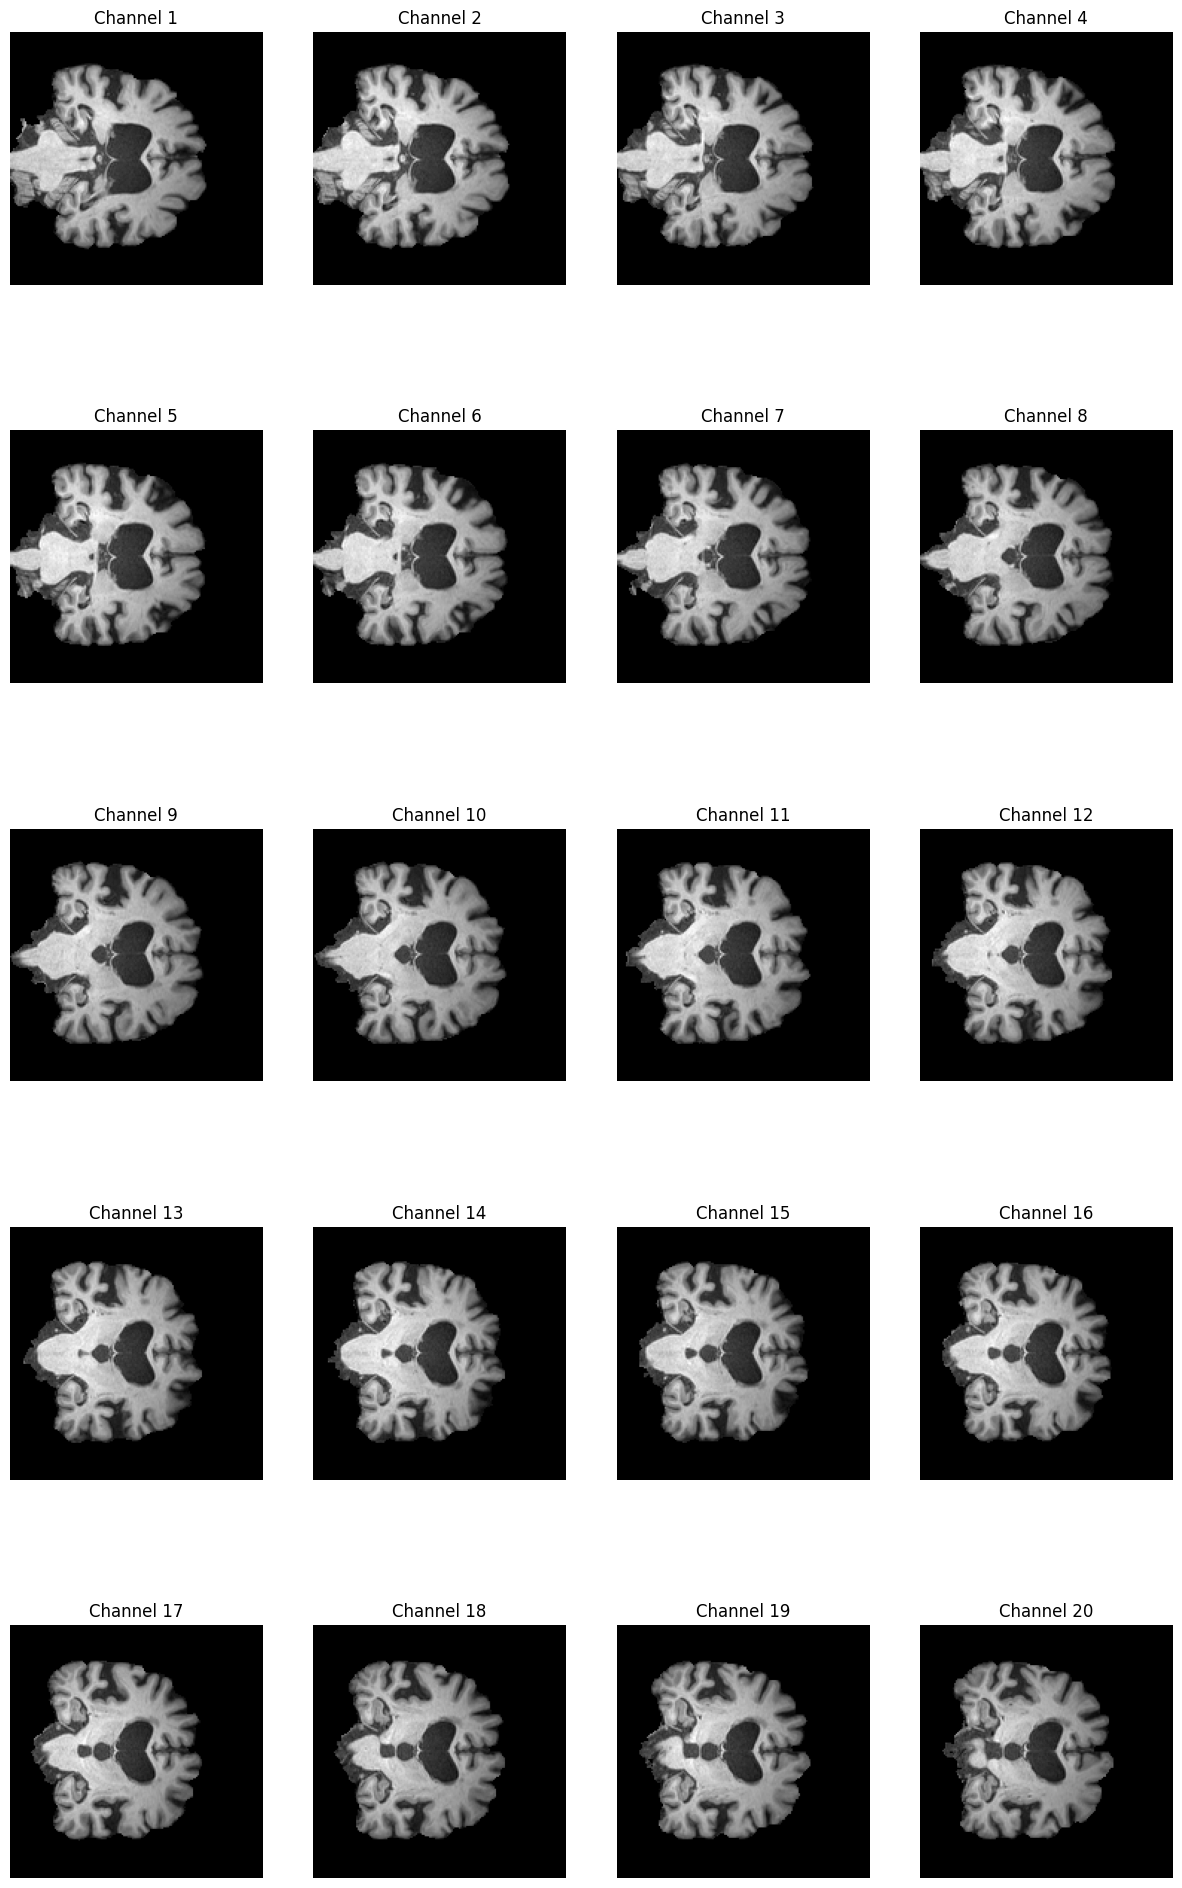

In [45]:
import matplotlib.pyplot as plt

# Visualize the top 3 channels of the image data
num_channels = 20
num_cols = 4
num_rows = -(-num_channels // num_cols)  # Ceiling division to calculate number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i in range(num_channels):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(img_data[:, 100+i, :], cmap='gray')
    axs[row, col].set_title(f'Channel {i+1}')
    axs[row, col].axis('off')
plt.show()
